In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit # for sigmoid. The expit function, also known as the logistic function, is defined as expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function
from scipy.spatial import distance
from math import exp, expm1
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

print('OK')

OK


In [2]:
r_data = pd.read_csv('data-logistic.csv', index_col=None, header=None)
x = r_data[r_data.columns[1:3]]
y = r_data[r_data.columns[0]]
le = len(x)
print('OK')

OK


In [3]:
def my_grad_reg(C,k,le,x,y,w0,w1):
    W = []
    for j in np.arange(0,num_iter):
        w0l = w0
        w1l = w1
        w0 = w0 + k*np.mean((y*x.iloc[:,0]*(1-expit(y*(w0*x.iloc[:,0]+w1*x.iloc[:,1]))))) - k*C*w0
        w1 = w1 + k*np.mean((y*x.iloc[:,1]*(1-expit(y*(w0*x.iloc[:,0]+w1*x.iloc[:,1]))))) - k*C*w1
        dist = distance.euclidean([w0,w1], [w0l,w1l])    
        W.append(dist)
        if dist <= min_dist:
            break
    return dist,w0,w1,W
#print(W)
#print(len(W))
print('OK')

OK


0.9268571428571428
0.9362857142857142
6
[0.045405514266151796, 0.009261143226346392, 0.0016424595906386961, 0.0002707036661950129, 4.124974142271603e-05, 5.83362642710993e-06]
OK


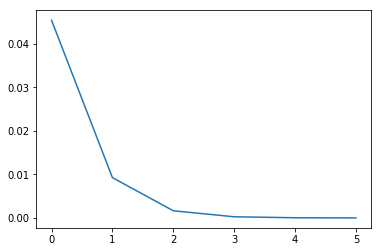

In [8]:
num_iter = 10000
min_dist = expm1(1e-5)
k = 0.1
C = 0
w0 = 0
w1 = 0
dist,w0,w1,W = my_grad_reg(C,k,le,x,y,w0,w1)
a0 = expit(w0*x.iloc[:,0] + w1*x.iloc[:,1]) # result model - probality level
score_0 = roc_auc_score(y, a0)
print(score_0)

C = 10
w0 = 0
w1 = 0
dist,w0,w1,W = my_grad_reg(C,k,le,x,y,w0,w1)
a1 = expit(w0*x.iloc[:,0] + w1*x.iloc[:,1]) # result model - probality level
score_1 = roc_auc_score(y, a1)
print(score_1)

f= open("answers_8/1.txt","w+")
f.write(str(np.round((score_0), decimals=3))+' '+str(np.round((score_1), decimals=3)))
f.close()

print(len(W))
print(W)
plt.plot(np.arange(0,len(W)),W)
print('OK')